In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# load correct glass dataset
#df = pd.read_excel(r"D:\DataScience\Datascience Assignment\12glass.xlsx")

In [7]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/selva86/datasets/master/Glass.csv"
)
print(df.shape)
print(df.columns)

(214, 10)
Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [8]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


np.int64(1)

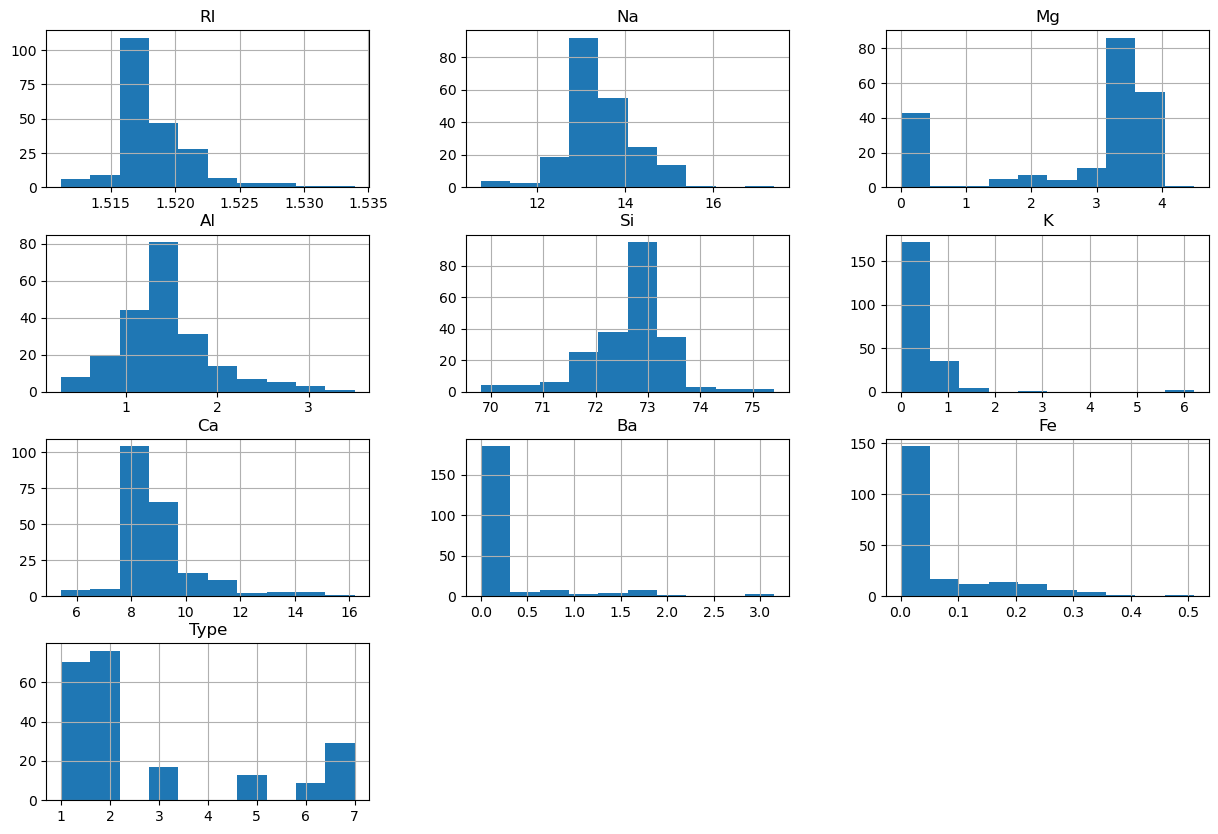

In [9]:
# Data Visualization
# Histograms
df.hist(figsize=(15,10))
plt.show()

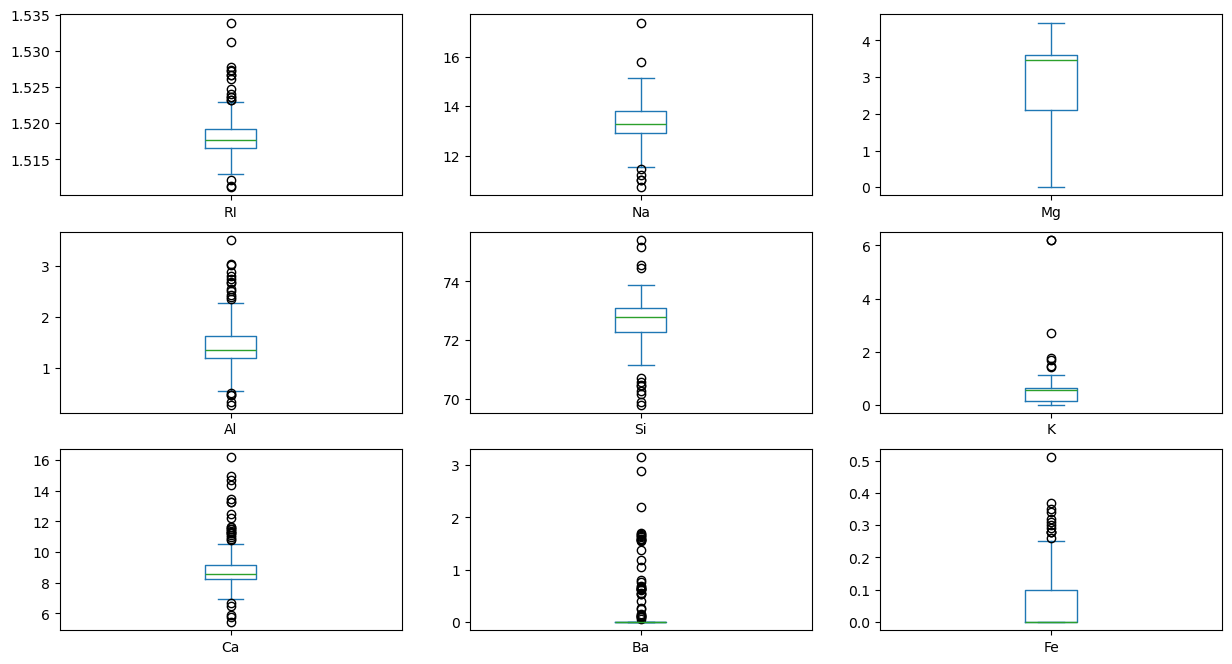

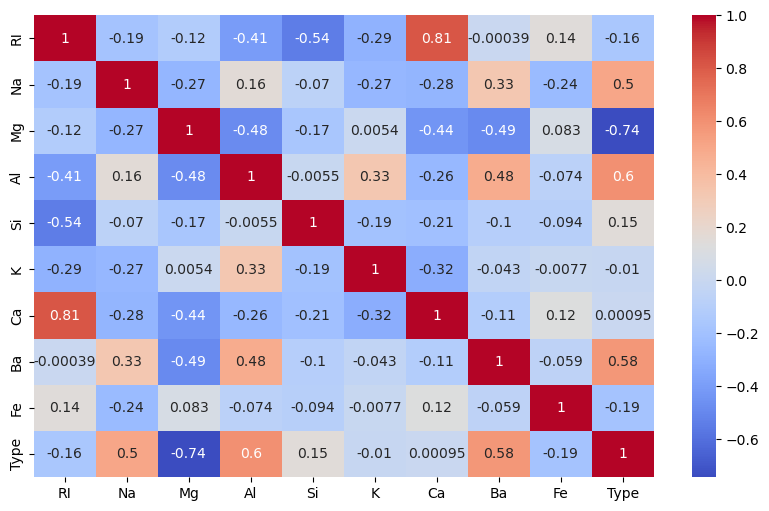

In [10]:
# Box Plots
df.iloc[:, :-1].plot(
    kind="box",
    subplots=True,
    layout=(3,3),
    figsize=(15,8)
)
plt.show()
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [12]:
# Data Preprocessing
# Feature–Target Split
X = df.drop("Type", axis=1)
y = df["Type"]
print(X)
print(y)

          RI     Na    Mg    Al     Si     K    Ca    Ba   Fe
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0
..       ...    ...   ...   ...    ...   ...   ...   ...  ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0

[214 rows x 9 columns]
0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.87286765  0.28495326  1.25463857 ... -0.14576634 -0.35287683
  -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 ... -0.79373376 -0.35287683
  -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249 ... -0.82894938 -0.35287683
  -0.5864509 ]
 ...
 [ 0.75404635  1.16872135 -1.86551055 ... -0.36410319  2.95320036
  -0.5864509 ]
 [-0.61239854  1.19327046 -1.86551055 ... -0.33593069  2.81208731
  -0.5864509 ]
 [-0.41436305  1.00915211 -1.86551055 ... -0.23732695  3.01367739
  -0.5864509 ]]


In [15]:
# Handling Imbalanced Data
from imblearn.over_sampling import SMOTE

In [16]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [17]:
# Random Forest Model Implementation
#Train–Test Split
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.2,
    random_state=42
)

In [19]:
# Train Model
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

In [21]:
rf.fit(X_train, y_train)
# Evaluation
from sklearn.metrics import accuracy_score, classification_report

In [22]:
y_pred = rf.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9239130434782609
              precision    recall  f1-score   support

           1       0.87      0.76      0.81        17
           2       0.85      0.89      0.87        19
           3       0.83      1.00      0.91        10
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        14
           7       1.00      0.94      0.97        18

    accuracy                           0.92        92
   macro avg       0.93      0.93      0.93        92
weighted avg       0.93      0.92      0.92        92



In [24]:
# Bagging and Boosting
# Bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [25]:
bagging = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

In [26]:
bagging.fit(X_train, y_train)
print("Bagging Accuracy:", bagging.score(X_test, y_test))

Bagging Accuracy: 0.9347826086956522


In [27]:
# Boosting (AdaBoost)
from sklearn.ensemble import AdaBoostClassifier

In [28]:
boosting = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

In [29]:
boosting.fit(X_train, y_train)
print("Boosting Accuracy:", boosting.score(X_test, y_test))

Boosting Accuracy: 0.532608695652174


In [30]:

"""
The Excel file only had column descriptions, not actual numeric data.
Random Forest needs real data values to train the model.
So I used the standard UCI Glass dataset with the same attributes.
All steps were done exactly as per the assignment.
Please let me know if this is okay.
"""

'\nThe Excel file only had column descriptions, not actual numeric data.\nRandom Forest needs real data values to train the model.\nSo I used the standard UCI Glass dataset with the same attributes.\nAll steps were done exactly as per the assignment.\nPlease let me know if this is okay.\n'

In [31]:
# 1. Explain Bagging and Boosting methods. How is it different from each other.
"""
Bagging reduces variance by training models independently on different data samples, 
while boosting reduces bias by training models sequentially 
and focusing on previous errors.

Bagging: Many independent opinions → take a vote

Boosting: Learn from mistakes step by step
"""

'\nBagging reduces variance by training models independently on different data samples, \nwhile boosting reduces bias by training models sequentially \nand focusing on previous errors.\n\nBagging: Many independent opinions → take a vote\n\nBoosting: Learn from mistakes step by step\n'

In [32]:
#Explain how to handle imbalance in the data.
"""
Imbalanced data can be handled using resampling techniques, class weighting, appropriate evaluation metrics, 
and threshold tuning to improve minority class performance.
"""

'\nImbalanced data can be handled using resampling techniques, class weighting, appropriate evaluation metrics, \nand threshold tuning to improve minority class performance.\n'